# dataframe useful methods and attributes
- head(), tail()
- info()
- describe()
- shape
- values: A two-dimensional NumPy array of values.
- columns: An index of columns: the column names.
- index: An index for the rows: either row numbers or row names.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/homelessness.csv'
homeless = pd.read_csv(url, index_col = 0)

In [2]:
# Print the head of the homelessness data
homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [3]:
# Print information about homelessness
homeless.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


In [4]:
# Print the shape of homelessness
print(homeless.shape)

(51, 5)


In [5]:
# Print a description of homelessness
print(homeless.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


In [6]:
# Print the row index of homelessness
print(homeless.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')


In [7]:
# Print the values of homelessness
print(homeless.values[:5])

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]]


In [8]:
# Print the column index of homelessness
print(homeless.columns)


Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [9]:
# sorting based on  values of a columns
#Sort homelessness by the number of homeless individuals, from smallest to largest
homelessness_ind = homeless.sort_values('individuals')
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


In [10]:
# Sort homelessness by descending family members
homelessness_fam = homeless.sort_values('family_members', ascending = False)
homelessness_fam.head()

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [11]:
# Sort homelessness by region, then descending family members
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homeless.sort_values(['region', 'family_members'], ascending = [True,False])
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


In [12]:
# Select the state and family_members columns
state_fam = homeless[['state','family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [13]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homeless[homeless['individuals']>10000]

# See the result
ind_gt_10k

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


In [14]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homeless[(homeless['family_members']<1000)
& (homeless['region']=="Pacific") ]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


In [15]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homeless[(homeless['region'] == 'South Atlantic')
| (homeless['region'] == 'Mid-Atlantic')]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [16]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homeless[homeless['state'].isin( canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


In [17]:
# Add total col as sum of individuals and family_members
homeless['total'] = homeless['individuals']+homeless['family_members']

# Add p_individuals col as proportion of total that are individuals
homeless['p_individuals'] = homeless['individuals']/homeless['total']

# See the result
homeless.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [18]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homeless["indiv_per_10k"] = 10000 * homeless["individuals"] / homeless["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homeless[homeless["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


# summary statistics

### Summarizing numerical data
- .median() , .mode()
- .min() , .max()
- .var() , .std()
- .sum()
- .quantile()

### Cumulative statistics
.cummax()
.cummin()
.cumprod()

In [19]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/sales_subset.csv'
sales = pd.read_csv(url, index_col = 0)

In [20]:
# Print the head of the sales DataFrame
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [21]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 768.1+ KB
None


In [22]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

23843.950148505668


In [23]:
# Print the median of weekly_sales
print(sales['weekly_sales'].median())

12049.064999999999


The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

df['column'].agg(function)

In [24]:
# "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile
# define "IQR"  as custome functio
# A custom IQR function
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [25]:
# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))  

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [26]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [27]:
#creat a dataframe that contain the sales data for department 1 of store 1
sales_1_1= sales[(sales['department'] == 1) & (sales['store'] == 1)]
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [28]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

In [29]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

In [30]:
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

In [31]:
# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


### Q1. 
- Remove rows of sales with duplicate pairs of store and type 
- Subset the rows that are holiday weeks using the is_holiday column, and drop the duplicate dates

In [32]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ['store','type'])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [33]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset = ['store', 'department'])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [34]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates(['date'])

In [35]:
# Print date col of holiday_dates
sales['date']

0        2010-02-05
1        2010-03-05
2        2010-04-02
3        2010-05-07
4        2010-06-04
            ...    
10769    2011-12-09
10770    2012-02-03
10771    2012-06-08
10772    2012-07-13
10773    2012-10-05
Name: date, Length: 10774, dtype: object

In [36]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

In [37]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])

In [38]:
store_counts = sales['type'].value_counts()
print(store_counts)

A    9872
B     902
Name: type, dtype: int64


In [39]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
store_counts

A    11
B     1
Name: type, dtype: int64

In [40]:
# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize = True)
store_props

A    0.916667
B    0.083333
Name: type, dtype: float64

In [41]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort = True)
dept_counts_sorted

1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64

In [42]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
dept_props_sorted

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64

### Grouped summary statistics

In [43]:
# without using groupby method
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()


# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()


# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [44]:
# using groupby
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [45]:
#multiple grouping 
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type','is_holiday'])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [46]:
# Multiple grouped summaries
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([min, max, np.mean, np.median])

# Print sales_stats
sales_stats

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [47]:
# For each store type, aggregate unemployment and fuel_price_ucsd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
unemp_fuel_stats

unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

### Pivot tables
are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby()

In [48]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values= 'weekly_sales' ,index ='type' )

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [49]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values= 'weekly_sales', index = 'type',aggfunc = [np.mean, np.median])

# Print mean_med_sales_by_type
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [50]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales', columns= 'is_holiday', index = 'type')

# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


In [51]:
# Print mean weekly_sales by department and type; fill missing values with 0
sales.pivot_table(values = 'weekly_sales', columns = 'type', index = 'department', fill_value = 0)

type,A,B
department,,
1,30961.725379,44050.626667
2,67600.158788,112958.526667
3,17160.002955,30580.655000
4,44285.399091,51219.654167
5,34821.011364,63236.875000
...,...,...
95,123933.787121,77082.102500
96,21367.042857,9528.538333
97,28471.266970,5828.873333


In [52]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value = 0, margins = True)

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


### Indexes

In [53]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/temperatures.csv'
temperatures = pd.read_csv(url, index_col = 0) 

In [54]:
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [55]:
# Set the index of temperatures to city
temperatures_ind= temperatures.set_index('city')

# Look at temperatures_ind
temperatures_ind.head()

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2000-03-01,Côte D'Ivoire,29.061
Abidjan,2000-04-01,Côte D'Ivoire,28.162
Abidjan,2000-05-01,Côte D'Ivoire,27.547


In [56]:
# Reset the temperatures_ind index, keeping its contents
temperatures_ind.reset_index().head()

,city,date,country,avg_temp_c
0,Abidjan,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,2000-05-01,Côte D'Ivoire,27.547


In [57]:
# Reset the temperatures_ind index, dropping its contents
temperatures_ind.reset_index(drop = True).head()

,date,country,avg_temp_c
0,2000-01-01,Côte D'Ivoire,27.293
1,2000-02-01,Côte D'Ivoire,27.685
2,2000-03-01,Côte D'Ivoire,29.061
3,2000-04-01,Côte D'Ivoire,28.162
4,2000-05-01,Côte D'Ivoire,27.547


The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.


In [58]:
# Create a list called cities that contains "Moscow" and "Saint Petersburg".
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
temperatures[temperatures['city'].isin(cities)].head()

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357


In [59]:
# Subset temperatures_ind using .loc[]
temperatures_ind.loc[cities].head()

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357


### Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). ?  
> There is a trade-off to using these.

- The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.  

- The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [60]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro') , ('Pakistan', 'Lahore')]

# Subset for rows to keep
temperatures_ind.loc[rows_to_keep]

date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]

In [61]:
# Sort temperatures_ind by index values
temperatures_ind.sort_index().head()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658

In [62]:
# Sort temperatures_ind by index values at the city level
temperatures_ind.sort_index(level = 'city').head()

date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547

In [63]:
# Sort temperatures_ind by country then descending city
temperatures_ind.sort_index(level = ['country','city'], ascending = [True, False]).head()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658

### Slicing index values
slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number
- You can only slice an index if the index is sorted (using .sort_index()).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to .loc[], it will slice the rows.

In [64]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
temperatures_srt.loc['Pakistan':'Russia']

date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]

In [65]:
# Try to subset rows from Lahore to Moscow
temperatures_srt.loc['Lahore':'Moscow']

date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]

In [66]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia','Moscow')]

date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]

In [67]:
temperatures_srt

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [68]:
#Use .loc[] slicing to subset rows from India, Hyderabad to Iraq, Baghdad.
temperatures_srt.loc[('India','Hyderabad'): ('Iraq','Baghdad')]

date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]

In [69]:
#Use .loc[] slicing to subset columns from date to avg_temp_c.
temperatures_srt.loc[:,'date':'avg_temp_c']

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [70]:
#Slice in both directions at once from Hyderabad to Baghdad, and date to avg_temp_c
temperatures_srt.loc[('India','Hyderabad'): ('Iraq','Baghdad'),'date':'avg_temp_c']

date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]

### date slicing
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. 
- The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year

In [71]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures.date >= '2010') & (temperatures.date <= '2011-12-31')]
"""Be careful when using Boolean conditions to subset dates. Using a 
check like df['date'] == '2011' or df['date'] <= '2011' will not check for all dates in 2011, 
and will only check for the date 2011-01-01.Write out the full date when using Boolean conditions (e.g. 2011-12-31)."""
temperatures_bool

,date,city,country,avg_temp_c
120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,2010-03-01,Abidjan,Côte D'Ivoire,29.596
123,2010-04-01,Abidjan,Côte D'Ivoire,29.068
124,2010-05-01,Abidjan,Côte D'Ivoire,28.258
...,...,...,...,...
16474,2011-08-01,Xian,China,23.069
16475,2011-09-01,Xian,China,16.775
16476,2011-10-01,Xian,China,12.587
16477,2011-11-01,Xian,China,7.543


In [72]:
# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
temperatures_ind.loc['2010':'2011']

,city,country,avg_temp_c
date,,,
2010-01-01,Faisalabad,Pakistan,11.810
2010-01-01,Melbourne,Australia,20.016
2010-01-01,Chongqing,China,7.921
2010-01-01,São Paulo,Brazil,23.738
2010-01-01,Guangzhou,China,14.136
...,...,...,...
2010-12-01,Jakarta,Indonesia,26.602
2010-12-01,Gizeh,Egypt,16.530
2010-12-01,Nagpur,India,19.120


In [73]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
temperatures_ind.loc['2010-08':'2011-02']

,city,country,avg_temp_c
date,,,
2010-08-01,Calcutta,India,30.226
2010-08-01,Pune,India,24.941
2010-08-01,Izmir,Turkey,28.352
2010-08-01,Tianjin,China,25.543
2010-08-01,Manila,Philippines,27.101
...,...,...,...
2011-01-01,Dar Es Salaam,Tanzania,28.541
2011-01-01,Nairobi,Kenya,17.768
2011-01-01,Addis Abeba,Ethiopia,17.708


In [74]:
# change the type of date column to datetimelike object
temperatures['date'] = pd.to_datetime(temperatures.date, format='%Y-%m-%d')


In [75]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index = ['country', 'city'], columns = 'year')

# See the result
temp_by_country_city_vs_year

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

In [76]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   
         Hyderabad    27.231833  27.555167  27.665167  27.844583  27.228500   
         Jaipur       26.430250  26.023000  27.031667  26.027417  26.642167   
         Kanpur       25.353917  25.326500  26.116833  25.409083  25.586500   
         Lakhnau      25.353917  25.326500  26.116833  25.409083  25.586500   
         Madras       28.811667  29.162917  29.246500  29.273083  28.810917   
         Nagpur       26.181417  26.321667  26.753000  26.503833  26.406333   
         New Delhi    26.048333  25.862917  26.634333  25.721083  26.239917   
         Pune         25.110917  25.337833  25.583000  25.748417  25.316167   
         Surat        27.029000  26.897250  27.347750  27.230917  27.290583   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Alexandria   21.082333  21.148167  21.507750  21.739000  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   
         Hyderabad    27.488833  27.471000  27.545333  27.446667  28.026500   
         Jaipur       25.772250  26.429833  26.267000  25.877583  26.919500   
         Kanpur       25.621500  25.848833  25.436083  25.109750  25.987083   
         Lakhnau      25.621500  25.848833  25.436083  25.109750  25.987083   
         Madras       29.099417  29.073250  28.970167  29.024083  29.417417   
         Nagpur       26.229167  26.374833  26.393667  26.188000  27.138917   
         New Delhi    25.716083  26.365917  26.145667  25.675000  26.554250   
         Pune         25.085583  25.310167  25.584833  25.230250  25.868250   
         Surat        26.724500  27.149417  27.311750  26.828750  27.819833   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333

In [77]:
# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India','Delhi') ]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333  10.121500  
India    Ahmadabad    28.017833  27.290417  27.027250  27.608625  
         Bangalore    25.705250  25.362083  26.042333  26.610500  
         Bombay       27.765417  27.384917  27.192500  26.713000  
         Calcutta     27.288833  26.406917  26.935083  27.369250  
         Delhi        26.520250  25.629500  25.889417  26.709250

In [78]:
# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India','Delhi'),2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

In [79]:
## Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis = 'index')
mean_temp_by_year

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.312285
dtype: float64

In [80]:
# Filter for the year that had the highest mean temp
mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()]

year
2013    20.312285
dtype: float64

In [81]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis = 'columns')

# Filter for the city that had the lowest mean temp
mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()]

country  city  
China    Harbin    4.876551
dtype: float64

### visulization

In [121]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/avoplotto.pkl'
avocados = pd.read_pickle(url, compression=None)

In [122]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [123]:
avocados.isna().sum()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

### Bar plots 
are great for revealing relationships between categorical (size) and numeric (number sold) variables,

In [98]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.pivot_table('nb_sold', index = 'size',
aggfunc = sum)

In [99]:
nb_sold_by_size

,nb_sold
size,
extra_large,1.561752e+08
large,2.015012e+09
small,2.054936e+09


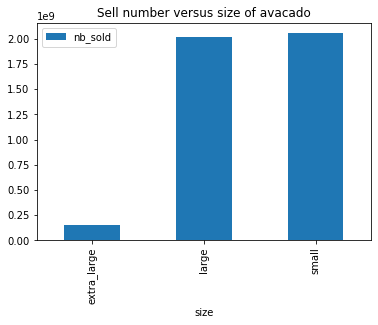

In [100]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = 'bar', title = 'Sell number versus size of avacado')
# Show the plot
plt.show()

### Line plots 
are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point

In [101]:
#Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional
nb_sold_by_date = avocados.pivot_table('nb_sold', index = 'date', aggfunc = sum)

In [102]:
nb_sold_by_date.head()

,nb_sold
date,
2015-01-04,27279606.03
2015-01-11,25081927.33
2015-01-18,24961540.48
2015-01-25,24094678.66
2015-02-01,39838734.08


<AxesSubplot:title={'center':'Sell number based on date'}, xlabel='date'>

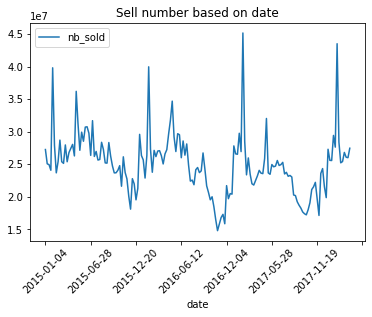

In [103]:
nb_sold_by_date.plot(kind = 'line', title = 'Sell number based on date', rot = 45)

### Scatter plots 
are ideal for visualizing relationships between numerical variables

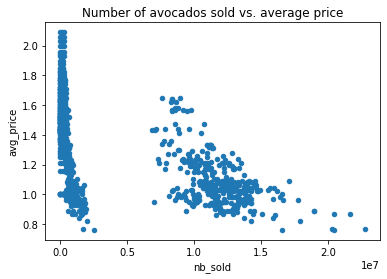

In [104]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x ='nb_sold', y = 'avg_price',kind = 'scatter', title = 'Number of avocados sold vs. average price' )

# Show the plot
plt.show()

> It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

### histogram

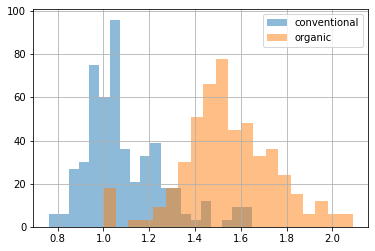

In [108]:
# Subset avocados for the conventional type, and the average price column. Create a histogram.
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist(bins = 20, alpha=0.5)

#Create a histogram of avg_price for organic type avocados.
# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist(bins = 20, alpha=0.5)
# Add a legend
plt.legend(['conventional', 'organic'])
plt.show()

### dealing with nan values


In [ ]:
# as there is no nan values in the avacados dataframe we slice it for 2016 and then replace some values with None

In [166]:
avocados_ind = avocados.set_index('date').sort_index()
avocados_2016 = avocados_ind.loc['2016-01':'2016-12-31']

In [167]:
avocados_2016.reset_index(inplace = True)

In [168]:
avocados_2016[['avg_price', 'nb_sold']].le(0.8).sum()

avg_price    3
nb_sold      0
dtype: int64

In [169]:
less_8 = avocados_2016.loc[avocados_2016['avg_price'].le(0.8)]
less_8

,date,type,year,avg_price,size,nb_sold
31,2016-02-07,conventional,2016,0.76,large,20470572.61
32,2016-02-07,conventional,2016,0.76,extra_large,2546439.11
35,2016-02-07,conventional,2016,0.76,small,16573573.78


In [170]:
avocados_2016.loc[avocados_2016['avg_price'].le(0.8)]['avg_price'].values

array([0.76, 0.76, 0.76])

In [171]:
avocados_2016.replace(0.76, None)

,date,type,year,avg_price,size,nb_sold
0,2016-01-03,conventional,2016,0.86,small,11616506.17
1,2016-01-03,conventional,2016,0.86,large,16054083.86
2,2016-01-03,organic,2016,1.43,large,246580.95
3,2016-01-03,organic,2016,1.43,small,124799.63
4,2016-01-03,organic,2016,1.43,extra_large,7749.40
...,...,...,...,...,...,...
307,2016-12-25,organic,2016,1.34,small,93875.25
308,2016-12-25,conventional,2016,1.0,extra_large,541972.42
309,2016-12-25,conventional,2016,1.0,small,9255125.20
310,2016-12-25,conventional,2016,1.0,large,10282925.61


In [172]:
avocados_2016.isna().sum()


date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

In [173]:
# or lets sample of 15 and change some columns to none
sample_15 = avocados_2016.sample(15)
sample_15

,date,type,year,avg_price,size,nb_sold
83,2016-04-03,organic,2016,1.44,small,119283.90
96,2016-04-24,organic,2016,1.25,large,524511.95
149,2016-06-19,organic,2016,1.45,large,445194.49
127,2016-05-29,organic,2016,1.41,extra_large,13698.09
172,2016-07-17,organic,2016,1.63,large,359772.18
40,2016-02-14,organic,2016,1.37,small,102897.63
203,2016-08-21,conventional,2016,1.10,large,9906498.51
231,2016-09-25,conventional,2016,1.22,large,9255913.78
62,2016-03-13,conventional,2016,0.93,large,13104887.66
283,2016-11-27,conventional,2016,1.21,large,7337341.77


In [184]:
sample_index = sample_15.index
sample_index

Int64Index([83, 96, 149, 127, 172, 40, 203, 231, 62, 283, 257, 168, 76, 226,
            14],
           dtype='int64')

In [182]:
# sample of 15 columns number
import numpy as np
np.random.seed(123)
columns = np.random.randint(1,6,15)
columns

array([3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2])

In [191]:
# we replace the values in the columns sample and index with None
for i, j in zip(sample_index, columns):
    avocados_2016.iloc[i, j] = None

In [195]:
avocados_2016.isna().sum()

date         0
type         3
year         6
avg_price    3
size         2
nb_sold      1
dtype: int64

<AxesSubplot:>

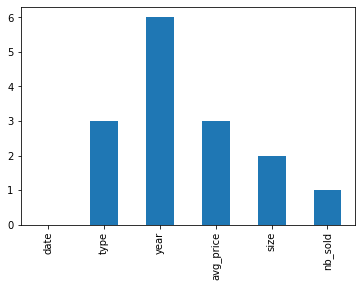

In [196]:
avocados_2016.isna().sum().plot(kind = 'bar')

### creating dataframes

In [207]:
table = [['date','small_sold','large_sold'],
["2019-11-03",10376832,7835071],
["2019-11-10",10717154,8561348]]

In [209]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [210]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096
